<a href="https://colab.research.google.com/github/peteryu24/petercoding-python/blob/main/load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
391/391 - 187s - loss: 1.6634 - accuracy: 0.3888 - val_loss: 1.3181 - val_accuracy: 0.5285 - 187s/epoch - 479ms/step
Epoch 2/30
391/391 - 178s - loss: 1.2606 - accuracy: 0.5517 - val_loss: 1.1167 - val_accuracy: 0.6044 - 178s/epoch - 455ms/step
Epoch 3/30
391/391 - 177s - loss: 1.0802 - accuracy: 0.6184 - val_loss: 0.9633 - val_accuracy: 0.6634 - 177s/epoch - 454ms/step
Epoch 4/30
391/391 - 180s - loss: 0.9850 - accuracy: 0.6528 - val_loss: 0.9062 - val_accuracy: 0.6843 - 180s/epoch - 460ms/step
Epoch 5/30
391/391 - 179s - loss: 0.9148 - accuracy: 0.6766 - val_loss: 0.8448 - val_accuracy: 0.7064 - 179s/epoch - 458ms/step
Epoch 6/30
391/391 - 178s - loss: 0.8516 - accuracy: 0.7002 - val_loss: 0.8142 - val_accuracy: 0.7208 - 178s/epoch - 456ms/step
Epoch 7/30
391/391 - 179s - loss: 0.8120 - accuracy: 0.7128 - val_loss: 0.7526 - val_accuracy: 0.7385 - 179s/epoch - 459ms/step
Epoch 8/30
391/391 - 179s - loss: 0.7725 - accuracy: 0.7302 - val_loss: 0.7286 - val_accuracy: 0.7450 - 

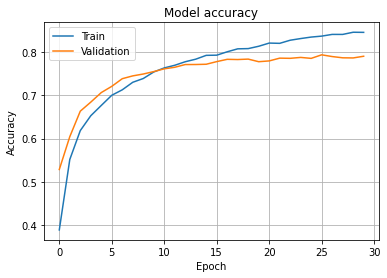

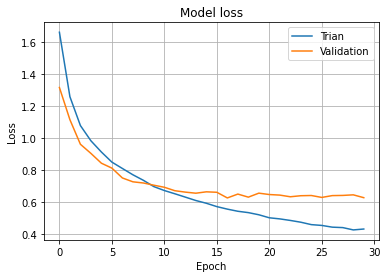

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

#after reading CIFAR-10 dataset convert to neural network type
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#no need to reshape for cifar-10 (prints to tensor)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#construct neural network model
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#learn neural network model
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#evaluating neural network model accuracy
res=cnn.evaluate(x_test,y_test,verbose=0)
print("Accuracy: ",res[1]*100)

import matplotlib.pyplot as plt

#accuracy graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

#loss function graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Trian','Validation'],loc='best')
plt.grid()
plt.show()

cnn.save("my_cnn.h5")

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10 

#read the file
cnn=tf.keras.models.load_model("my_cnn.h5") 
cnn.summary() 

(x_train,y_train),(x_test,y_test)=cifar10.load_data() 
x_train=x_train.astype(np.float32)/255.0 
x_test=x_test.astype(np.float32)/255.0 
y_train=tf.keras.utils.to_categorical(y_train,10) 
y_test=tf.keras.utils.to_categorical(y_test,10) 

res=cnn.evaluate(x_test,y_test,verbose=0)
print("Accuracy: ",res[1]*100)

